<h1><font color='#306998'><center>Introduction to Linear Regression</center></font></h1>
<h4><center>Python Implementation</center><h4>
<center>Kannan Singaravelu, CQF</center>

---

## Import Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Regressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Metrics
from sklearn.metrics import mean_squared_error

## Load Data

In [2]:
# Load data
boston_data = pd.read_csv('https://raw.githubusercontent.com/kannansingaravelu/datasets/refs/heads/main/boston.csv') 
boston_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# Define feature and target
X = boston_data.drop('medv', axis=1)      # Feature
y = boston_data['medv']                   # Label (target variable)

In [4]:
# Splitting the datasets into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Output the train and test data size
print(f"Train and Test Size {len(X_train)}, {len(X_test)}")

Train and Test Size 404, 102


In [5]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
220,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307,17.4,391.70,9.71
71,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64


In [6]:
y_train.head()

220    26.7
71     21.7
240    22.0
6      22.9
417    10.4
Name: medv, dtype: float64

## Linear Regression

In linear regression, the model coefficients are selected by minimizing a loss function. We will use Pipeline to fit the model. PipeLines are a sequence of data transformers with an optional final predictor. It allows you to sequentially apply a list of transformers to preprocess the data and, in the end, fit a predictor to the data. 

In [ ]:
# Linear or not?
# from sklearn.ensemble import GradientBoostingRegressor

In [7]:
# Use pipeline to define the linear regression model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [8]:
# fit/train model
pipe.fit(X_train, y_train)

# predict labels
y_pred = pipe.predict(X_test)

# metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse:0.4}')
print(f'RMSE: {rmse:0.4}')
print(f'R^2 Train: {pipe.score(X_train, y_train):0.4}')
print(f'R^2 Test: {pipe.score(X_test, y_test):0.4}')

MSE: 33.45
RMSE: 5.784
R^2 Train: 0.773
R^2 Test: 0.5892


In [9]:
# Get the coefficients or weights of the model
pipe['regressor'].coef_

array([-0.97082019,  1.05714873,  0.03831099,  0.59450642, -1.8551476 ,
        2.57321942, -0.08761547, -2.88094259,  2.11224542, -1.87533131,
       -2.29276735,  0.71817947, -3.59245482])

In [10]:
# Get the intercept of the regression model
pipe['regressor'].intercept_

np.float64(22.611881188118804)

## Regularized Regression
If the coeficients are too large in linear regression, it can lead to overfitting the model. We do regularization to over come such issues that penalises large coefficients. Lasso and Ridge regression are penalty regression that prevent over-fitting from the simple linear regression.

### LASSO
The Least Absolute Shrinkage and Selection Operator (LASSO) is a variation of linear regression. In Lasso, the loss function is minimized by limiting the sum of absolute values of the model coefficients where the L1 penalty term is added to the Residual Sum of Squares (RSS). The L1 penalty term not only shrinks the coefficents, but shrinks some of them to zero and that is very useful for feature selection. <br><br>

In [11]:
# Use pipeline to define the Lasso model
laso = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=0.1))
])

In [12]:
# fit lasso model
laso.fit(X_train, y_train)
print(f'R^2 Train: {laso.score(X_train, y_train):0.4}')
print(f'R^2 Test: {laso.score(X_test, y_test):0.4}')

R^2 Train: 0.7677
R^2 Test: 0.5664


In [13]:
# Visualize
alpha_range = np.linspace(0.01,1,50)
score = []
la_mse = []
la_rmse = []

for i in alpha_range:
    laso = Pipeline([('scaler', StandardScaler()), ('regressor', Lasso(alpha=i))])
    laso.fit(X_train, y_train)
    mse = mean_squared_error(y_test, laso.predict(X_test))
    rmse = np.sqrt(mse)
    
    la_mse.append(mse)
    la_rmse.append(rmse)
    score.append(laso.score(X_test, y_test))

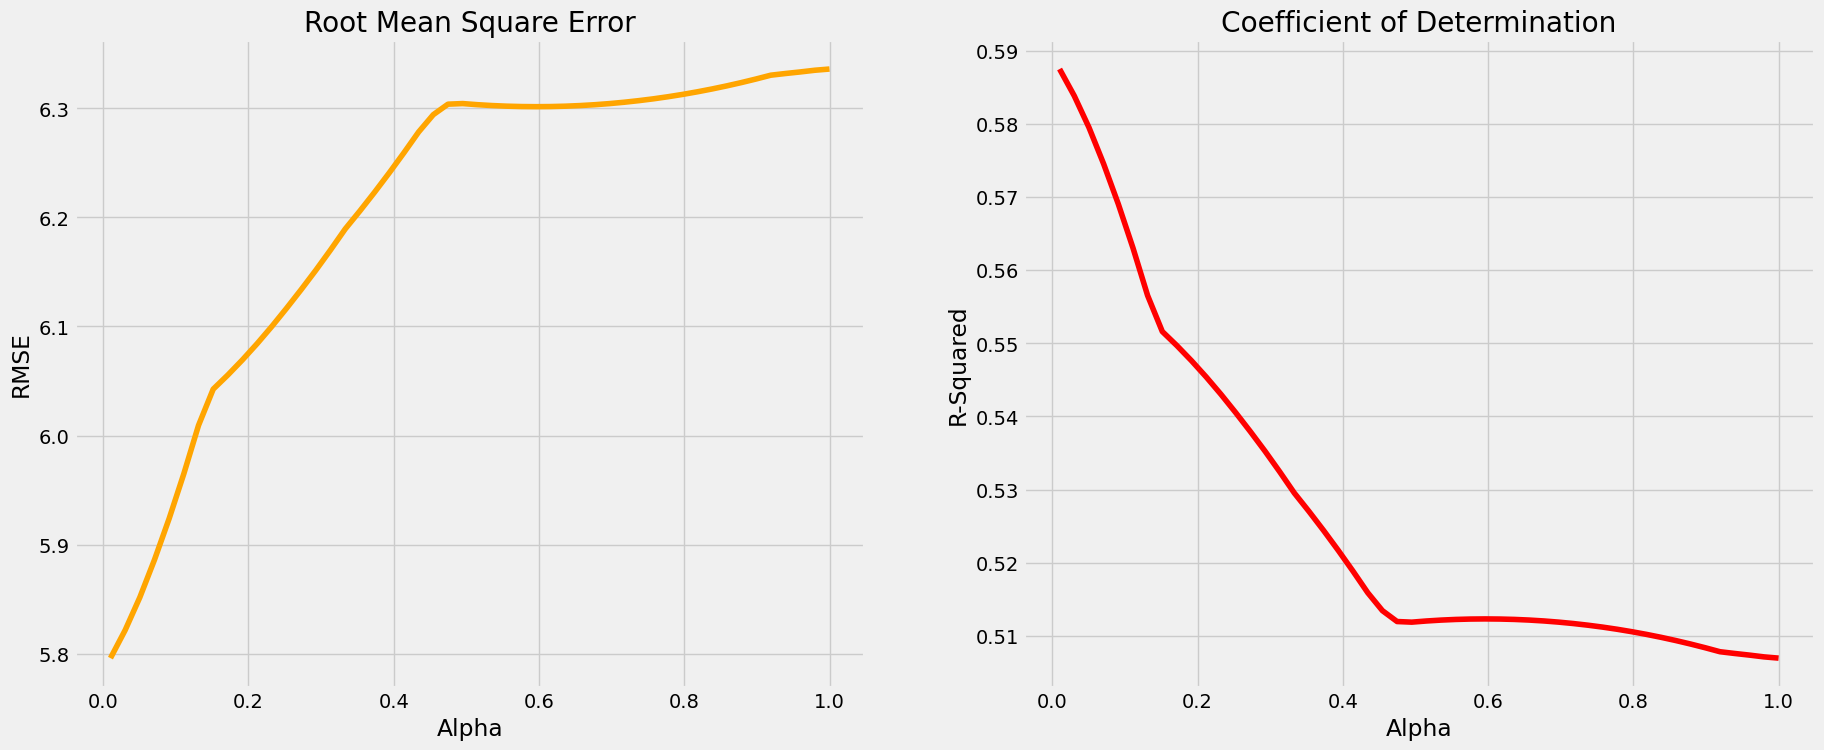

In [14]:
# Plot RMSE
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].plot(alpha_range, la_rmse, 'orange')
ax[0].set_title('Root Mean Square Error')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('RMSE')

# Plot R^2
ax[1].plot(alpha_range, score, 'r-')
ax[1].set_title('Coefficient of Determination')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('R-Squared');

### Ridge
In ridge regression, the cost function is altered by adding a L2 penality equivalent to square of the magnitude of the coefficients. The Ridge regression shrinks the coefficients and helps to reduce the multi-collinearity. As seen from the above graph, when $\lambda \xrightarrow {}0$, the cost function becomes similar to the linear regression cost function RSS.

In [15]:
# Use pipeline to define the ridge model
rid = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1))
])

In [16]:
# fit ridge model
rid.fit(X, y)
print(f'R^2 Train: {rid.score(X_train, y_train):0.4}')
print(f'R^2 Test: {rid.score(X_test, y_test):0.4}')

R^2 Train: 0.77
R^2 Test: 0.6184


In [17]:
# Visualize
alpha_range = np.arange(1,2000,100)
score = []
rid_mse = []
rid_rmse = []

for i in alpha_range:
    rid = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge(alpha=i))])
    rid.fit(X, y)
    mse = mean_squared_error(y_test, rid.predict(X_test))
    rmse = np.sqrt(mse)
    
    rid_mse.append(mse)
    rid_rmse.append(rmse)
    score.append(rid.score(X_test, y_test))

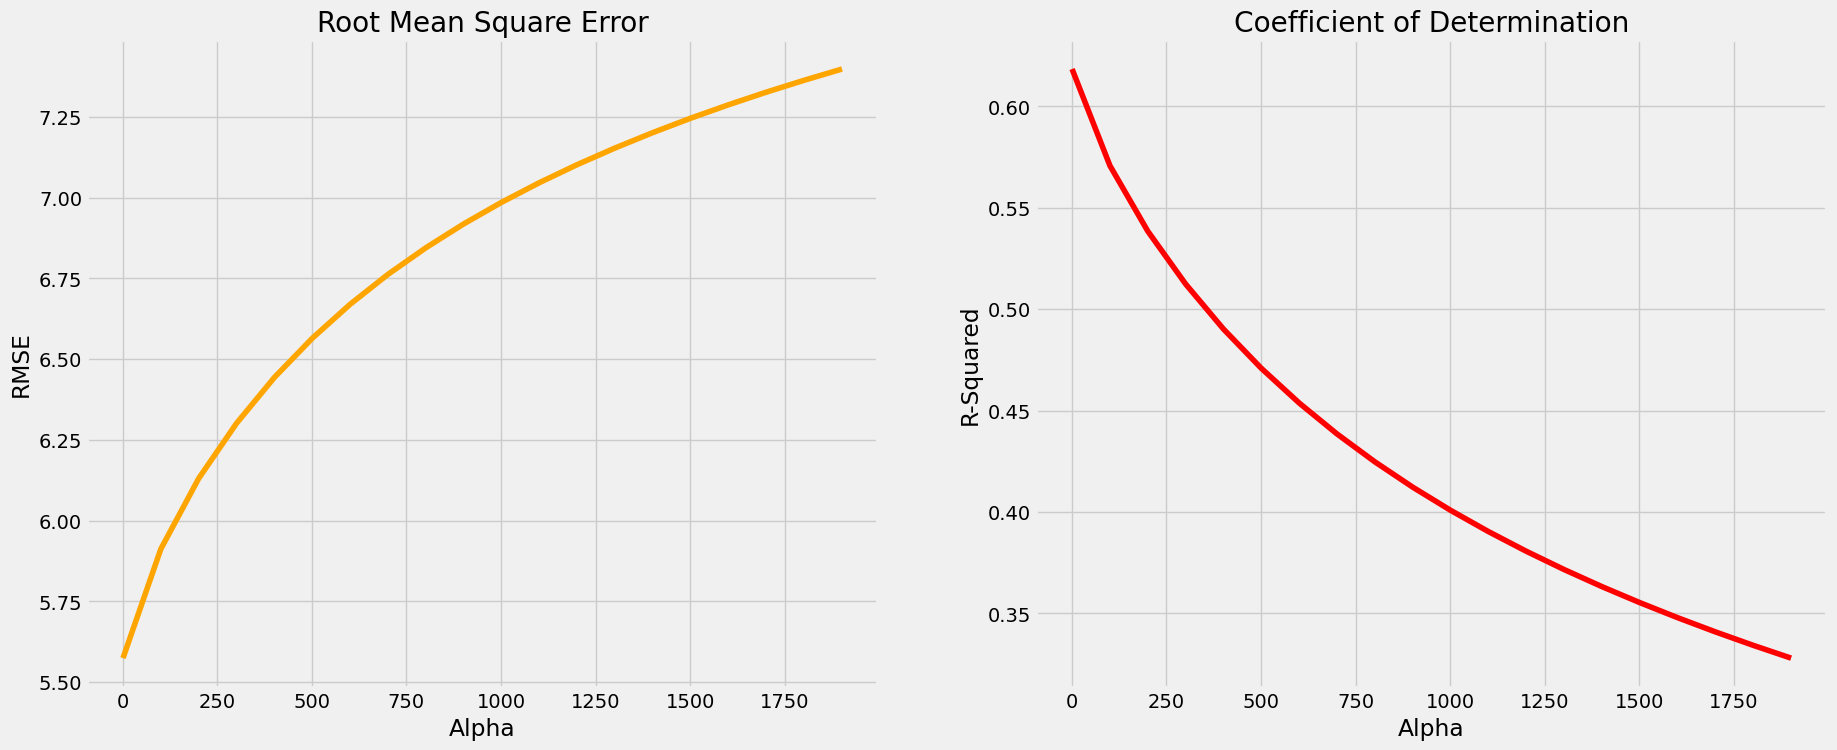

In [18]:
# Plot RMSE
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].plot(alpha_range, rid_rmse, 'orange')
ax[0].set_title('Root Mean Square Error')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('RMSE')

# Plot R^2
ax[1].plot(alpha_range, score, 'r-')
ax[1].set_title('Coefficient of Determination')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('R-Squared');

## ElasticNet Regression
ElasticNet combines the properties of both Lasso and Ridge regression. It penalizes the model using both the L1 and L2 norm. <br><br> 

In [19]:
# Use pipeline to define the elastic net model
elastic = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.5))
])

In [20]:
# fit elasticnet model
elastic.fit(X_train, y_train)
print(f'R^2 Train: {elastic.score(X_train, y_train):0.4}')
print(f'R^2 Test: {elastic.score(X_test, y_test):0.4}')

R^2 Train: 0.7671
R^2 Test: 0.5617


In [21]:
# Visualize
alpha_range = np.linspace(0.01,15,150)
score = []
elastic_mse = []
elastic_rmse = []
elastic_coef = []

for i in alpha_range:
    elastic = Pipeline([('scaler', StandardScaler()), ('regressor', ElasticNet(alpha=i))])
    elastic.fit(X, y)
    mse = mean_squared_error(y_test, elastic.predict(X_test))
    rmse = np.sqrt(mse)
    
    elastic_mse.append(mse)
    elastic_rmse.append(rmse)
    elastic_coef.append(elastic['regressor'].coef_)
    score.append(elastic.score(X_test, y_test))

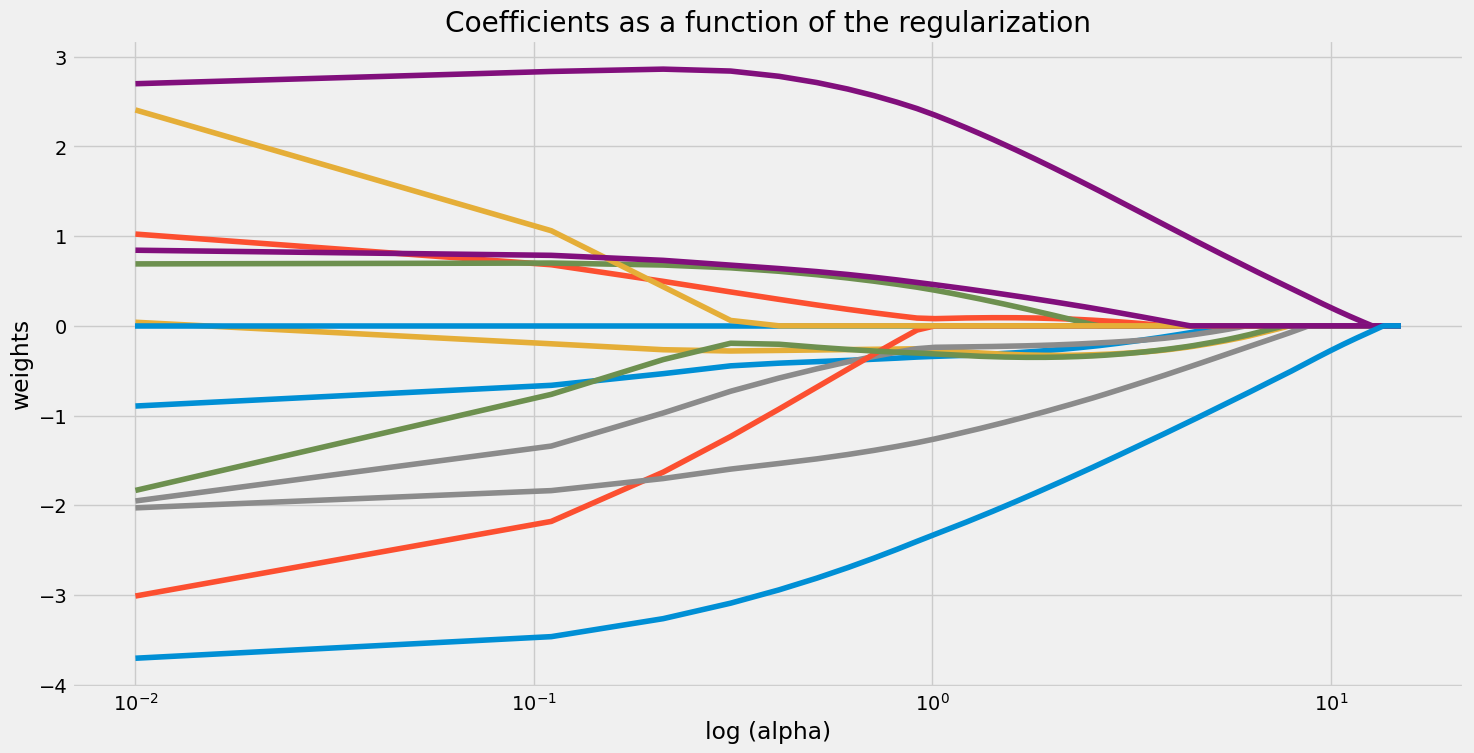

In [22]:
# Plot Coefficients
fig = plt.figure(figsize=(16,8))
ax = plt.axes()
ax.plot(alpha_range, elastic_coef)
ax.set_xscale('log')
ax.set_title('Coefficients as a function of the regularization')
ax.set_xlabel('log (alpha)')
ax.set_ylabel('weights');

## References

* [Scikit-learn Documentation](https://scikit-learn.org/stable/index.html)
* [Scikit-learn API Reference](https://scikit-learn.org/stable/modules/classes.html)
* [Python Resources](https://github.com/kannansingaravelu/PythonResources) 

---
Python Labs by [Kannan Singaravelu](https://www.linkedin.com/in/kannansi)